In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from urllib.request import urlopen
import requests
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

from scipy import stats
from sklearn.ensemble import RandomForestClassifier 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy

Using TensorFlow backend.


In [3]:
link = "https://raw.githubusercontent.com/shuailab/ind_498/master/resource/data/KR.csv"
r = requests.get(link)
data = pd.read_csv(StringIO(r.text))
X = data[['x']]
Y = data[['y']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


### evaluating neural networks with different number of hidden nodes

In [6]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_regressor(knodes):
    regressor = Sequential()
    regressor.add(Dense(units = knodes, kernel_initializer = 'uniform', 
                        activation = 'tanh', input_dim = 1))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform'))
    regressor.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
    return regressor

knodes = 3
regressor3 = KerasRegressor(build_fn = build_regressor, batch_size = 50, epochs = 1500,
                           knodes=knodes,verbose=0, shuffle=True)
accuracies = - cross_val_score(estimator = regressor3, X = x_train, y = y_train, 
                             cv = 5,scoring='neg_mean_squared_error')
mean = accuracies.mean()
print("mse of {nodes} hidden nodes: {mean}".format(nodes=knodes,mean=mean) )

knodes = 5
regressor5 = KerasRegressor(build_fn = build_regressor, batch_size = 50, epochs = 1500,
                           knodes=knodes, verbose=0, shuffle=True)
accuracies = - cross_val_score(estimator = regressor5, X = x_train, y = y_train, 
                             cv = 5,scoring='neg_mean_squared_error')
mean = accuracies.mean()
print("mse of {nodes} hidden nodes: {mean}".format(nodes=knodes,mean=mean) )

knodes = 8
regressor8 = KerasRegressor(build_fn = build_regressor, batch_size = 50, epochs = 1500,
                           knodes=knodes, verbose=0, shuffle=True)
accuracies = - cross_val_score(estimator = regressor8, X = x_train, y = y_train, 
                             cv = 5,scoring='neg_mean_squared_error')
mean = accuracies.mean()
print("mse of {nodes} hidden nodes: {mean}".format(nodes=knodes,mean=mean) )

mse of 3 hidden nodes: 0.16067383116712391
mse of 5 hidden nodes: 0.1667907724462137
mse of 8 hidden nodes: 0.09785693224858205


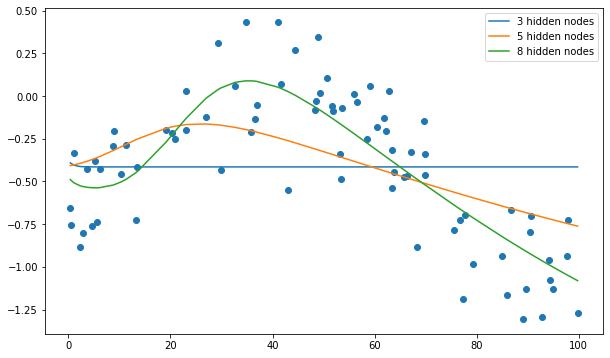

In [7]:
# plot fitted curves
regressor3.fit(x_train, y_train,verbose=0)
y_pred3 = regressor3.predict(x_train)

regressor5.fit(x_train, y_train,verbose=0)
y_pred5 = regressor5.predict(x_train)

regressor8.fit(x_train, y_train,verbose=0)
y_pred8 = regressor8.predict(x_train)

xy_zip_sort = sorted(zip(x_train.x,y_pred3), key=lambda x: x[0])
x_sort, y_pred3 = zip(*xy_zip_sort)
xy_zip_sort = sorted(zip(x_train.x,y_pred5), key=lambda x: x[0])
x_sort, y_pred5 = zip(*xy_zip_sort)
xy_zip_sort = sorted(zip(x_train.x,y_pred8), key=lambda x: x[0])
x_sort, y_pred8 = zip(*xy_zip_sort)

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x_train, y_train, marker='o')
ax.plot(x_sort, y_pred3,label="3 hidden nodes")
ax.plot(x_sort, y_pred5,label="5 hidden nodes")
ax.plot(x_sort, y_pred8,label="8 hidden nodes")
ax.legend()
plt.show()

In [8]:
# fit the best model
y_pred = regressor8.predict(x_test)
from sklearn.metrics import mean_squared_error
print('mean squared error:{mse}.'.format(
             mse= mean_squared_error(y_pred, y_test) ) )

mean squared error:0.023397069484810375.


### Convolutional neural network (CNN)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


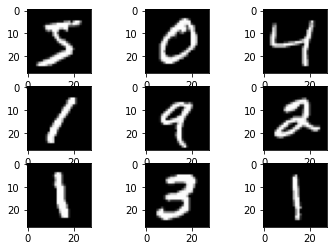

In [9]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

mnist.load_data()
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [10]:
# adapted from the example from https://keras.io/examples/mnist_cnn/
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

num_classes = 10 

# input image dimensions
img_rows, img_cols = 28, 28

# get and process
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [87]:
# batch_size = 128
# epochs = 3 # keep low epochs to reduce running time

from keras.wrappers.scikit_learn import KerasClassifier

def create_model(kernel_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(kernel_size, kernel_size),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (kernel_size, kernel_size), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return(model)
                  
def evaluate_model(kernel_size, x_train, y_train, x_test, y_test):
    model = create_model(kernel_size)
    model.fit(x_train, y_train,
              batch_size=128,
              epochs=3,
              verbose=0,
              validation_data=(x_test, y_test))
    _, acc = model.evaluate(x_test, y_test, verbose=0)
    return(acc)

from sklearn.model_selection import KFold
kfold = KFold(2, shuffle=True, random_state=1)
accuracies1 = list()
accuracies3 = list()
accuracies5 = list()
for train_ix, test_ix in kfold.split(x_train):
    # select rows for train and test
    trainX, trainY, testX, testY = x_train[train_ix], y_train[train_ix], x_train[test_ix], y_train[test_ix]
    # evaluate model
    acc1 = evaluate_model(1, x_train, y_train, x_test, y_test)
    accuracies1.append(acc1)
    acc3 = evaluate_model(3, x_train, y_train, x_test, y_test)
    accuracies3.append(acc3)
    acc5= evaluate_model(5, x_train, y_train, x_test, y_test)
    accuracies5.append(acc5)

In [88]:
mean = np.mean(accuracies1)
print("Accuracy of kernel size {kernel_size}: {mean}".format(kernel_size=1,mean=mean) )
mean = np.mean(accuracies3)
print("Accuracy of kernel size {kernel_size}: {mean}".format(kernel_size=3,mean=mean) )
mean = np.mean(accuracies5)
print("Accuracy of kernel size {kernel_size}: {mean}".format(kernel_size=5,mean=mean) )

Accuracy of kernel size 1: 0.9074000120162964
Accuracy of kernel size 3: 0.98785001039505
Accuracy of kernel size 5: 0.9900999963283539


In [89]:
final_model = create_model(5)
final_model.fit(x_train, y_train,
              batch_size=128,
              epochs=3,
              verbose=0,
              validation_data=(x_test, y_test))
_, acc = final_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on testing data: {acc}".format(acc=acc))

Accuracy on testing data: 0.9890000224113464


In [97]:
from keras.models import Model
layer_outputs = [layer.output for layer in final_model.layers[0:7]]
activation_model = Model(inputs=final_model.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

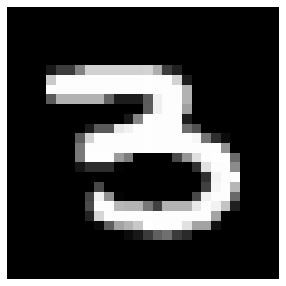

In [98]:
img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [99]:
activations = activation_model.predict(img)

(1, 24, 24, 32) conv2d_63
(1, 12, 12, 32) max_pooling2d_38
(1, 8, 8, 64) conv2d_64
(1, 4, 4, 64) max_pooling2d_39
(1, 1024) flatten_32
skip
(1, 128) dense_99
skip
(1, 10) dense_100
skip


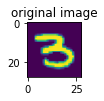

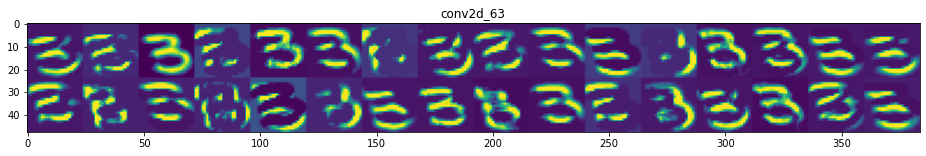

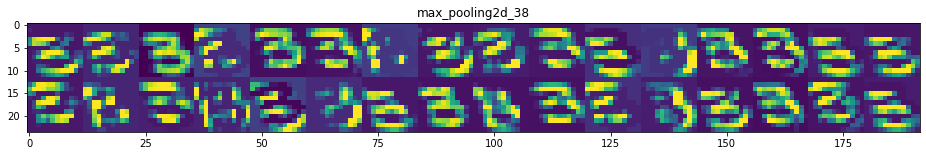

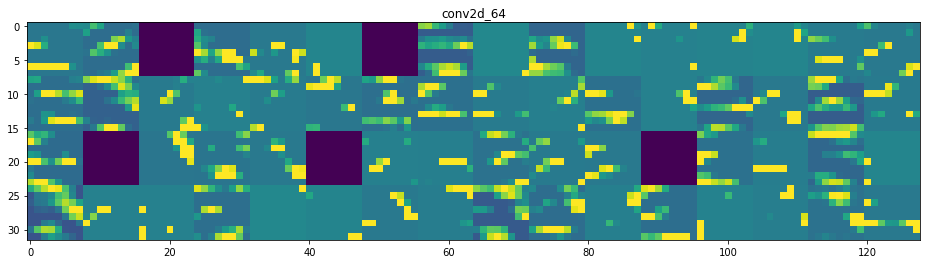

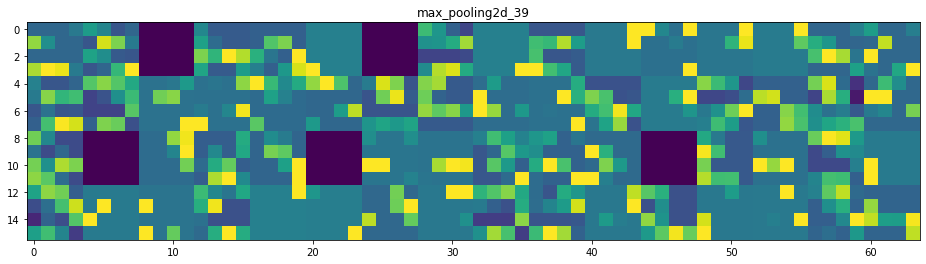

In [107]:
# visualization
# code adapted from https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8

img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(1,1))
plt.imshow(img[0,:,:,0],cmap="viridis")
plt.title("original image")
# plt.axis('off')

layer_names = []
for layer in final_model.layers[0:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    print(layer_activation.shape, layer_name)
    if(len(layer_activation.shape) < 4):
        print("skip")
        continue
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
